In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [146]:
harry_potter = pd.read_csv("/content/drive/MyDrive/Harry_Potter_Scraped_Dataset.csv")

In [147]:
harry_potter

,Book Name,Copies Sold in UK,Copies Sold WorldWide,Publish Date,Publish Month,Publish Year,Pages,Words,Audiobook,Total Awards Won
0,Harry Potter and the Sorcerer’s Stone,4.2,120,26,June,1997,223,"76,944",9 hrs and 33 mins,8
1,Harry Potter and the Chamber of Secrets,3.5,77,2,July,1998,251,"85,141",11 hrs and 5 mins,5
2,Harry Potter and the Prisoner of Azkaban,3.4,65,8,July,1999,317,"107,253",13 hrs and 10 mins,3
3,Harry Potter and the Goblet of Fire,3.6,65,8,July,2000,636,"190,637",22 hrs and 17 mins,1
4,Harry Potter and the Order of the Phoenix,4.2,65,21,June,2003,766,"257,045",30 hrs and 18 mins,1
5,Harry Potter and the Half-blood Prince,4.1,65,16,July,2005,607,"168,923",21 hrs and 27 mins,1
6,Harry Potter and the Deathly Hallows,4.5,65,21,July,2007,607,"198,227",24 hrs,0


In [148]:
print(harry_potter.columns.tolist())

['Book Name', 'Copies Sold in UK', 'Copies Sold WorldWide', 'Publish Date', 'Publish Month', 'Publish Year', 'Pages', 'Words', 'Audiobook', 'Total Awards Won']


In [149]:
# Начнём с того, что число проданных копий исчисляется в миллионах, но пишется в сокращённом виде, из-за чего с ним неудобно работать
fix_1 = harry_potter['Copies Sold in UK'].tolist()
fix_2 = harry_potter['Copies Sold WorldWide'].tolist()


fix_3 = []
fix_4 = []

for i in fix_1:
  i = int(i * 1000000)
  fix_3.append(int(i))

fix_3[5] = fix_3[5] + 1

for i in fix_2:
  i = i * 1000000
  fix_4.append(int(i))


harry_potter['Copies Sold in UK'] = fix_3
harry_potter['Copies Sold WorldWide'] = fix_4


In [150]:
# теперь превратим число слов из строки в число
fix_5 = harry_potter['Words'].tolist()
fix_6 = []

for i in fix_5:
  i = i.replace(',', '')
  fix_6.append(int(i))

harry_potter['Words'] = fix_6


In [151]:
# Теперь необходимо конвертировать время из строки в число минут

fix_7 = harry_potter['Audiobook'].tolist()
fix_8 = []


for i in fix_7:
  i = i.split()
  if len(i) < 4:
    i.extend((0, 0))
  minutes = int(i[0]) * 60  + int(i[3])
  fix_8.append(minutes)
  minutes

harry_potter['Audiobook'] = fix_8

In [152]:
# Скорректируем название колонок
harry_potter.columns = ['Book Name', 'Copies Sold in UK', 'Copies Sold WorldWide', 'Publish Date', 'Publish Month', 'Publish Year', 'Pages', 'Words', 'Audiobook (in minutes)', 'Total Awards Won']

In [153]:
# Итоговый результат

harry_potter

,Book Name,Copies Sold in UK,Copies Sold WorldWide,Publish Date,Publish Month,Publish Year,Pages,Words,Audiobook (in minutes),Total Awards Won
0,Harry Potter and the Sorcerer’s Stone,4200000,120000000,26,June,1997,223,76944,573,8
1,Harry Potter and the Chamber of Secrets,3500000,77000000,2,July,1998,251,85141,665,5
2,Harry Potter and the Prisoner of Azkaban,3400000,65000000,8,July,1999,317,107253,790,3
3,Harry Potter and the Goblet of Fire,3600000,65000000,8,July,2000,636,190637,1337,1
4,Harry Potter and the Order of the Phoenix,4200000,65000000,21,June,2003,766,257045,1818,1
5,Harry Potter and the Half-blood Prince,4100000,65000000,16,July,2005,607,168923,1287,1
6,Harry Potter and the Deathly Hallows,4500000,65000000,21,July,2007,607,198227,1440,0


In [154]:
# Благодаря преобразованиям можно выводить новые графики
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

import warnings



/usr/local/lib/python3.8/dist-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


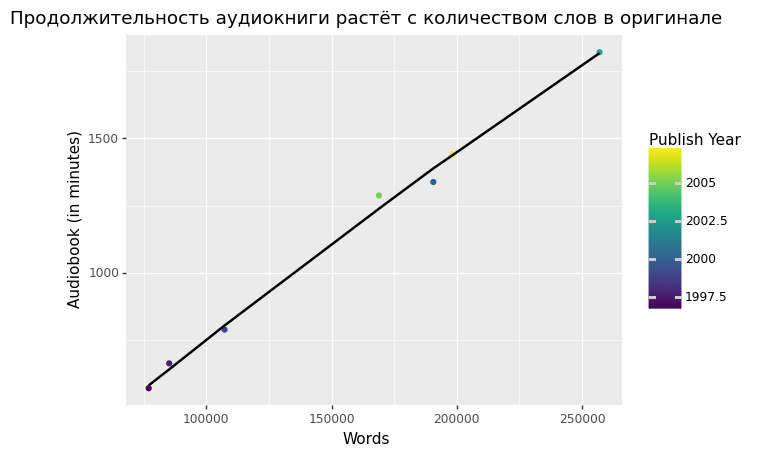

<ggplot: (8770289988521)>

In [155]:
ggplot(data=harry_potter, mapping=aes(x="Words", y="Audiobook (in minutes)")) +\
geom_point(mapping=aes(color="Publish Year")) +\
geom_smooth() +\
labs(title="Продолжительность аудиокниги растёт с количеством слов в оригинале")